In [2]:
import matplotlib.pyplot as plt
import numpy as np

Autovalore 1: 14.12+0.00j appartiene al disco centrato in 10.10 con raggio 10.10
Autovalore 1: 14.12+0.00j appartiene al disco centrato in 7.10 con raggio 7.10
Autovalore 2: 1.16+0.00j appartiene al disco centrato in 6.30 con raggio 6.30
Autovalore 2: 1.16+0.00j appartiene al disco centrato in 10.10 con raggio 10.10
Autovalore 2: 1.16+0.00j appartiene al disco centrato in 4.20 con raggio 4.20
Autovalore 2: 1.16+0.00j appartiene al disco centrato in 7.10 con raggio 7.10
Autovalore 3: 6.21+1.05j appartiene al disco centrato in 6.30 con raggio 6.30
Autovalore 3: 6.21+1.05j appartiene al disco centrato in 10.10 con raggio 10.10
Autovalore 3: 6.21+1.05j appartiene al disco centrato in 4.20 con raggio 4.20
Autovalore 3: 6.21+1.05j appartiene al disco centrato in 7.10 con raggio 7.10
Autovalore 4: 6.21-1.05j appartiene al disco centrato in 6.30 con raggio 6.30
Autovalore 4: 6.21-1.05j appartiene al disco centrato in 10.10 con raggio 10.10
Autovalore 4: 6.21-1.05j appartiene al disco centrato 

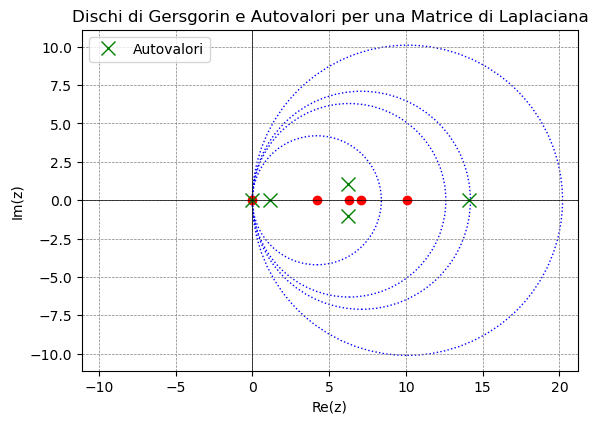

In [5]:
# La matrice di Laplaciana L
L = np.array([
    [6.3, -3.7, -2.6, 0, 0],
    [-8.9, 10.1, 0, -1.2, 0],
    [0, 0, 4.2, -1.9, -2.3],
    [0, 0, 0, 0, 0],
    [-4.4, 0, 0, -2.7, 7.1]
])

# Centri dei dischi (gli elementi diagonali)
centers = np.diag(L)

# Raggi dei dischi (somma dei valori assoluti degli elementi non diagonali per ogni riga)
radii = np.sum(np.abs(L), axis=1) - np.abs(centers)

# Calcolo degli autovalori della matrice L
eigenvalues = np.linalg.eigvals(L)

# Funzione per verificare se un autovalore è dentro un disco di Gersgorin
def is_within_disk(eigenvalue, center, radius):
    return np.abs(eigenvalue - center) <= radius

# Stampa gli autovalori e verifica a quale disco appartengono
for i, eigenvalue in enumerate(eigenvalues):
    for j, (center, radius) in enumerate(zip(centers, radii)):
        if is_within_disk(eigenvalue, center, radius):
            print(f"Autovalore {i+1}: {eigenvalue:.2f} appartiene al disco centrato in {center:.2f} con raggio {radius:.2f}")

# Crea il grafico
fig, ax = plt.subplots()

# Disegna ogni disco di Gersgorin
for center, radius in zip(centers, radii):
    circle = plt.Circle((center, 0), radius, color='b', fill=False, linestyle='dotted')
    ax.add_artist(circle)
    ax.plot(center, 0, 'ro')  # Centro del disco

# Aggiungi gli autovalori al grafico
ax.plot(eigenvalues.real, eigenvalues.imag, 'gx', markersize=10, label='Autovalori')

# Imposta i limiti del grafico
ax.set_xlim(min(centers) - max(radii) - 1, max(centers) + max(radii) + 1)
ax.set_ylim(-max(radii) - 1, max(radii) + 1)

# Assegnazione delle etichette e titolo
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title('Dischi di Gersgorin e Autovalori per una Matrice di Laplaciana')
plt.legend()

# Mostra il grafico
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
